In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
train_num_path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/training-set/'
valid_num_path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/validation-set/'

In [3]:
def get_ch(file_name):
    ret = ''
    for ch in file_name:
        if u'\u4e00' <= ch <= u'\u9fff': 
            ret += ch
    return ret

In [4]:
def repeat_ch(file_name, ch):
    time_str = 'bk'
    file_name = file_name.replace(ch, time_str)
    return file_name
    

In [5]:
### 去除文件名中的中文--替换为bk  （存在中文字符cv2打不开）

def filename_not_ch(file_path):
    for root, dirs, files in os.walk(file_path):
         for d in dirs:
            data_dir = root + d
            for root1, dirs1, file1 in os.walk(data_dir):
                for f in file1:
                    data_img_path = data_dir + '/' + f
                    ch = get_ch(f)
                    if ch:
                        new_name = repeat_ch(f, ch)
                        new_path = data_dir + '/' + new_name
                        os.rename(data_img_path, new_path)

In [6]:
#filename_not_ch(train_num_path)
#filename_not_ch(valid_num_path)

In [7]:
def img2arr(file_path):
    img = cv2.imread(file_path, 2)
    img_flatten = np.array(img).flatten()
    return img_flatten

In [8]:
def get_dataset(dataset_path):
    data = []
    target = []

    for root, dirs, files in os.walk(dataset_path):
        for d in dirs:
            if (d.isdigit()):
                label = int(d)
                data_dir = root + d
                for root1, dirs1, file1 in os.walk(data_dir):
                    for f in file1:
                        data_img_path = data_dir + '/' + f
                        data_img_flatten = img2arr(data_img_path)

                        data.append(data_img_flatten)
                        target.append(label)
    data1 = np.array(data)
    target = np.array(target)
    return data1, target

In [9]:
train_data, train_target = get_dataset(train_num_path)

In [10]:
train_data.shape

(4285, 1280)

In [11]:
train_target.shape

(4285,)

In [12]:
valid_data, valid_target = get_dataset(valid_num_path)

In [13]:
valid_data.shape

(200, 1280)

In [14]:
valid_target.shape

(200,)

In [15]:
import keras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [16]:
train_x, test_x, train_y, test_y = train_test_split(train_data, train_target, test_size = 0.2, random_state = 1)

In [17]:
train_x.shape

(3428, 1280)

In [18]:
test_x.shape

(857, 1280)

In [19]:
IMG_HEIGHT = 40
IMG_WIDTH = 32
train_x = train_x.reshape(train_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1) / 255
test_x = test_x.reshape(test_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1) /255
train_y = keras.utils.to_categorical(train_y, num_classes = 34)
test_y = keras.utils.to_categorical(test_y, num_classes=34)


In [20]:
train_x.shape


### 构建网络

(3428, 40, 32, 1)

In [21]:
test_x.shape

(857, 40, 32, 1)

In [22]:
train_y.shape

(3428, 34)

In [23]:
test_y.shape

(857, 34)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [76]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(Conv2D(64, (2,2), strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(160))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(34))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 40, 32, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 40, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 16, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 160)               3276960   
_________________________________________________________________
activation_13 (Activation)   (None, 160)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)              

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, batch_size=100, epochs=20, validation_data=(test_x, test_y), workers=-1, verbose=1)

Train on 3428 samples, validate on 857 samples
Epoch 1/20
3428/3428 [==============================] - 7s 2ms/step - loss: 2.4998 - accuracy: 0.3183 - val_loss: 0.9859 - val_accuracy: 0.7888
Epoch 2/20
3428/3428 [==============================] - 7s 2ms/step - loss: 1.1942 - accuracy: 0.6345 - val_loss: 0.2350 - val_accuracy: 0.9498
Epoch 3/20
3428/3428 [==============================] - 7s 2ms/step - loss: 0.6219 - accuracy: 0.8043 - val_loss: 0.0958 - val_accuracy: 0.9872
Epoch 4/20
3428/3428 [==============================] - 7s 2ms/step - loss: 0.4257 - accuracy: 0.8638 - val_loss: 0.0482 - val_accuracy: 0.9930
Epoch 5/20
3428/3428 [==============================] - 7s 2ms/step - loss: 0.2964 - accuracy: 0.9011 - val_loss: 0.0265 - val_accuracy: 0.9942
Epoch 6/20
3428/3428 [==============================] - 7s 2ms/step - loss: 0.2252 - accuracy: 0.9256 - val_loss: 0.0231 - val_accuracy: 0.9942
Epoch 7/20
3428/3428 [==============================] - 7s 2ms/step - loss: 0.1994 - accu

In [78]:
valid_x = valid_data.reshape(valid_data.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)/255
valid_y = keras.utils.to_categorical(valid_target, num_classes=34)

In [79]:
score = model.evaluate(valid_x, valid_y)

200/200 [==============================] - 0s 595us/step


In [80]:
score

[0.019368500971722824, 0.9950000047683716]

In [84]:
predict_y = model.predict_classes(valid_x)

In [86]:
error_idx = []
error_prdict = []
error_true = []

for i in range(valid_x.shape[0]):
    if valid_target[i] != predict_y[i]:
        error_idx.append(i)
        error_prdict.append(predict_y[i])
        error_true.append(valid_target[i])

In [87]:
error_prdict

[13]

In [88]:
error_true

[0]

In [38]:
num_dict = {
    0:'0',
    1:'1',
    2:'2',
    3:'3',
    4:'4',
    5:'5',
    6:'6',
    7:'7',
    8:'8',
    9:'9',
    10:'A',
    11:'B',
    12:'C',
    13:'D',
    14:'E',
    15:'F',
    16:'G',
    17:'H',
    18:'J',
    19:'K',
    20:'L',
    21:'M',
    22:'N',
    23:'P',
    24:'Q',
    25:'R',
    26:'S',
    27:'T',
    28:'U',
    29:'V',
    30:'W',
    31:'X',
    32:'Y',
    33:'Z'
}
num_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'J',
 19: 'K',
 20: 'L',
 21: 'M',
 22: 'N',
 23: 'P',
 24: 'Q',
 25: 'R',
 26: 'S',
 27: 'T',
 28: 'U',
 29: 'V',
 30: 'W',
 31: 'X',
 32: 'Y',
 33: 'Z'}

In [74]:
def plot_error_num(err_data, err_predict, err_true):
    plt.figure(figsize=(15,15))
    for i in range(len(err_data)):
        plt.subplot(1, len(err_data), i +1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(err_data[i].reshape(IMG_HEIGHT,IMG_WIDTH), cmap="binary",  interpolation = 'nearest')
        plt.title('true: {}\npredict: {}'.format(num_dict[err_true[i]], num_dict[err_predict[i]]))
   

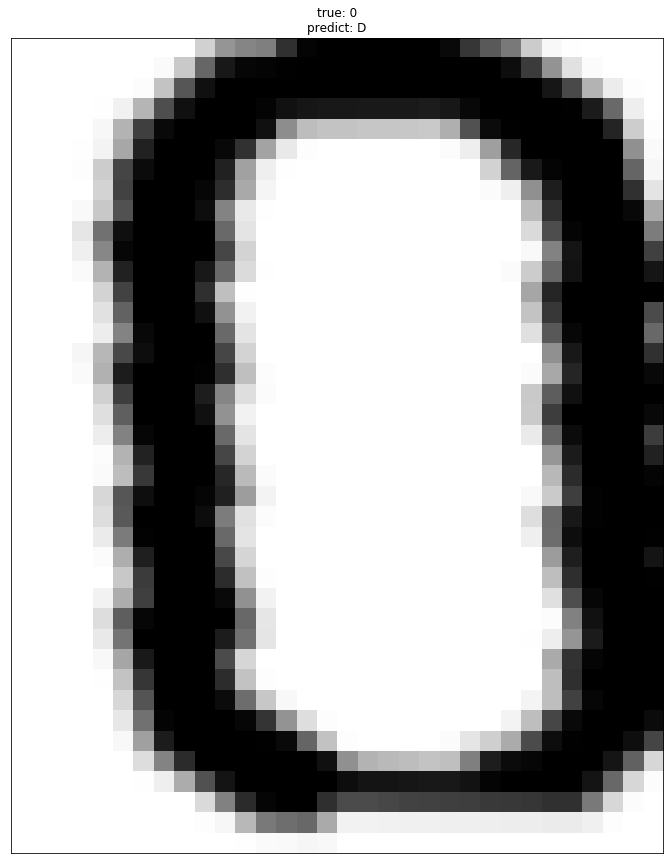

In [89]:
err_data = valid_data[error_idx]
plot_error_num(err_data, error_prdict, error_true)